# Mean-Variance Portfolio Optimization
This notebook implements the Mean-Variance portfolio optimization for a set of assets and plots the efficient frontier.

**Source:** Essentials of Financial Economics  
**Authors:** Michael Donadelli, Michele Costola, Ivan Gufler  
**Date:** May 8, 2025

## 0. Preliminaries

In this code we implement Markovitz's Mean-Variance approach for optimal portfolios in an economy with N=5 risky assets. The goal is to find the allocation of N risky assets that deliver an expected return $\mu_p$ with less risk as possible.

Formally, our problem is:

$$
\min_\mathbf{w} \mathbf{w}^\prime \Sigma \mathbf{w}  \quad \text{s.t.} \quad \mathbf{w}^\prime \mathbf{1} = 1 \quad \text{and} \quad \mathbf{w}^\prime \boldsymbol{\mu} = \mu_p
$$

The objective function $\mathbf{w}^\prime \Sigma \mathbf{w}$ is the variance of the porfolio, depending on the covariance matrix of the risky assets' returns, $\Sigma$, and on the portfolio weights $\mathbf{w}$. The constraints are:
- $\mathbf{w}^\prime 1= 1 $: the sum of portfolio weights is one, i.e. a fully invested portfolio
- $ \mathbf{w}^\prime \boldsymbol{\mu} = \mu_p$: the weighted expected returns of the stocks $\mathbf{w}^\prime \boldsymbol{\mu}$, equals the target expected return $\mu_p$

Recall: $\mu_p$ is what the target you choose!

The Lagrangian of the problem reads as:

$$
\mathcal{L} =\frac{1}{2} \mathbf{w}^\prime \Sigma \mathbf{w} + \lambda ( 1 -  \mathbf{w}^\prime \mathbf{1}) + \phi (\mu_p - \mathbf{w}^\prime \boldsymbol{\mu}) 
$$

The solution is found by taking the derivatives of $\mathcal{L}$ w.r.t. $\mathbf{w}$, $\lambda$ and $\phi$.


$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \Sigma \mathbf{w} - \lambda \mathbf{1} - \phi \boldsymbol{\mu} = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \mathbf{w}^\prime \mathbf{1} = 0 \\
\frac{\partial \mathcal{L}}{\partial \phi} = \mu_p - \mathbf{w}^\prime \boldsymbol{\mu} = 0
$$

From the first equation we solve for $\mathbf{w}$:

$$
\mathbf{w} = \lambda \Sigma^{-1} \mathbf{1} + \phi \Sigma^{-1} \boldsymbol{\mu}
$$

Pre-multiply the latter equation once by $\mathbf{1}^\prime$ and once by $mu^\prime$

$$
\underbrace{\mathbf{1}^\prime \mathbf{w}}_{1} = \lambda \underbrace{\mathbf{1}^\prime \Sigma^{-1} \mathbf{1}}_{A} + \phi \underbrace{\mathbf{1}^\prime \Sigma^{-1} \boldsymbol{\mu}}_{B}
$$

$$
\underbrace{\mu^\prime \mathbf{w}}_{\mu_p} = \lambda \underbrace{\boldsymbol{\mu}^\prime \Sigma^{-1} \mathbf{1}}_{B} + \phi \underbrace{\boldsymbol{\mu}^\prime \Sigma^{-1} \boldsymbol{\mu}}_{C}
$$

From the latter system we solve for $\lambda$ and $\phi$


$$
\lambda = \frac{C\mu_p - B}{AC - B^2}, \quad 
\psi = \frac{A - B\mu_p}{AC - B^2},
$$

Are we done? No, we have solved for the optimal weights $\mathbf{w}$ given a target expected return $\mu_p$. Our final goal is to represent the risk-return relationship for all efficient portfolios. Namely we want to construct the efficient frontier.

To do so, we proceed by computing the variance of the optimal portfolio. In practice we start with $\mathbf{w} = \lambda \Sigma^{-1} \mathbf{1} + \phi \Sigma^{-1} \mu$ and premultiply by $\mathbf{w}^\prime \Sigma$:

$$
\sigma^2_p = \mathbf{w}^\prime \Sigma \mathbf{w} = \lambda \mathbf{w}^\prime \underbrace{\Sigma \Sigma^{-1}}_{1} \mathbf{1} + \phi \mathbf{w}^\prime \underbrace{\Sigma \Sigma^{-1}}_{1} \boldsymbol{\mu}
$$

Substituting the equations for $\lambda$ and $\phi$:

$$
\sigma_p^2 = \frac{1}{\Delta} \left( C\mu_p^2 - 2B\mu_p + A \right).
$$

This equation describes the relationship between risk ($\sigma^2_p$) and return $\mu_p$. First, notice that $\sigma^2_p$ is incresing in $\mu_p$. Second, the RHS of the latter equation describes a parabola. Inverting this equation, or put it differently solving for $\mu_p$:

$$
\mu_p = \frac{B}{C} \pm \frac{\sqrt{\Delta (C\sigma_p^2 - 1)}}{C}.
$$
The last equation describes the parabola in the ($\sigma, \boldsymbol{\mu}$) space: the upper part ($+$) denotes the efficient part of the parabola

## 1. Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.close('all')

## 2. Load and Prepare Data

We use returns of the 5 oldest stocks in the DJIA index: Procter and Gamble, 3M, Merkx, IBM and American Express, from February 2000 to December 2022. 

After loading the data we compute the average return, a measure of expected returns, and the covariance matrix, which describes the comovement of stocks' returns.

In [60]:
Ret = pd.read_excel('../Data/Returns.xlsx', engine='openpyxl', sheet_name=0)

R = Ret.iloc[:, 1:].values
N = R.shape[1]

z = np.mean(R, axis=0).reshape(-1, 1)
sig = np.std(R, axis=0)
V = np.cov(R, rowvar=False, ddof=1)
V1 = np.linalg.inv(V)

print(Ret.head())


        Date        PG       MMM       IBM       MRK       AXP
0 2000-02-01 -0.128103 -0.058078 -0.084633 -0.217011 -0.184296
1 2000-03-01 -0.354197  0.010757  0.153281  0.009137  0.109921
2 2000-04-01  0.052864 -0.021877 -0.058077  0.124007  0.003777
3 2000-05-01  0.118157 -0.010100 -0.037557  0.073741  0.085480
4 2000-06-01 -0.146617 -0.025797  0.022199  0.030786 -0.034723


## 3. Efficient Frontier Parameters

The efficient frontier denotes the risk-return relationship of efficient portfolios and is described by the following equation:

$$
\sigma_p^2 = \frac{1}{\Delta} \left( C\mu_p^2 - 2B\mu_p + A \right).
$$

We compute $A$, $B$, $C$, and $AC - B^2$. Then we choose a vector of target expected returns, from 0% to 1.51% (recall these correspond to monthly returns). 

In [78]:
A = z.T @ V1 @ z
B = np.ones((N, 1)).T @ V1 @ z
C = np.ones((1, N)) @ V1 @ np.ones((N, 1))
D = A * C - B**2

mu_p = np.arange(0, 0.0151, 0.0001)
sig2_p = (1 / D) * (C * mu_p**2 - 2 * B * mu_p + A)
sig_p = np.sqrt(sig2_p)

[[0.93340153]] [[645.38636285]] [[4.51139479]] [[0.03298192]]


## 4. Plot Efficient Frontier

Plotting the efficient frontier involves plotting the values of $\mu_p$ that are achievable with the minimum risk as possible, $\sigma^2_p$. Additionally we plot the 5 individual stocks in the ($\sigma, \mu$) space and the global minimum variance portfolio.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


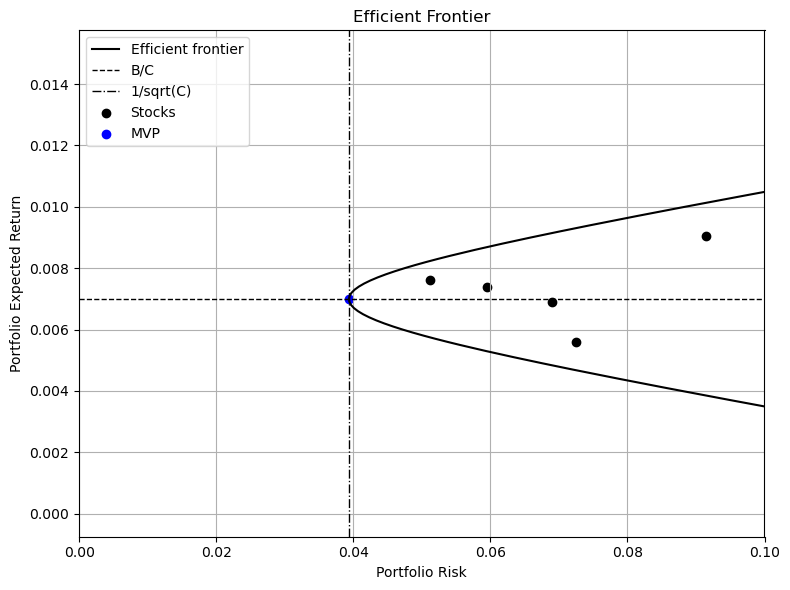

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(sig_p.T, mu_p, '-k', linewidth=1.5)
plt.axhline(y=B/C, linestyle='--', color='k', linewidth=1)
plt.axvline(1/np.sqrt(C), linestyle='-.', color='k', linewidth=1)
plt.scatter(sig, z.flatten(), color='k', label='Stocks')
plt.scatter(1/np.sqrt(C), B/C, color='b', label='MVP')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Expected Return')
plt.legend(['Efficient frontier', 'B/C', '1/sqrt(C)', 'Stocks', 'MVP'], loc='upper left')
plt.xlim(0, 0.1)
plt.grid(True)
plt.tight_layout()
plt.savefig('MV.eps', format='eps')
plt.show()

## 5. Compute Optimal Weights

Finally we compute the weights to build portfolios for different $\mu_p$, from 0.1% to 5%.

By substituiting $\lambda$ and $\phi$ and consequently $A$, $B$ and $C$ into $\mathbf{w} = \lambda \Sigma^{-1} \mathbf{1} + \phi \Sigma^{-1} \mu$ we obtain:

$$
\mathbf{w} = \mathbf{g} + \mathbf{h}\mu_p
$$

where
$$
\mathbf{g} = \frac{1}{\Delta} \left[ A(\Sigma^{-1}\mathbf{1}) - B(\Sigma^{-1}\boldsymbol{\mu}) \right],
\quad
\mathbf{h} = \frac{1}{\Delta} \left[ C(\Sigma^{-1}\boldsymbol{\mu}) - B(\Sigma^{-1}\mathbf{1}) \right].
$$

As reference, we also compute the global minimum variance portfolio weights. To do so we must set a target return $\mu_p$ equal to $\mu_{GMV}=B/C$

In [63]:
g = 1 / D * (A * (V1 @ np.ones((N, 1))) - B * (V1 @ z))
h = 1 / D * (C * (V1 @ z) - B * (V1 @ np.ones((N, 1))))

mup = np.linspace(0.001, 0.05, 10)
wp = g + h * mup
w_mvp = g + h * (B / C)


## 6. Save Weights to Excel

In [64]:
columns = ['GMVP'] + [str(round(mu * 100, 2)) + '%' for mu in mup]
index = Ret.columns[1:]

Weights = pd.DataFrame(index=index, columns=columns)
Weights['GMVP'] = w_mvp.flatten()
Weights[columns[1:]] = wp

Weights.to_excel('Weights_MV.xlsx')
Weights.head()

,GMVP,0.1%,0.64%,1.19%,1.73%,2.28%,2.82%,3.37%,3.91%,4.46%,5.0%
PG,0.448796,-0.161819,0.393162,0.948143,1.503125,2.058106,2.613087,3.168069,3.723050,4.278031,4.833012
MMM,0.212170,0.183556,0.209563,0.235571,0.261578,0.287586,0.313593,0.339601,0.365608,0.391616,0.417624
IBM,0.203032,1.962105,0.363304,-1.235496,-2.834296,-4.433096,-6.031896,-7.630697,-9.229497,-10.828297,-12.427097
MRK,0.168179,0.545842,0.202589,-0.140664,-0.483917,-0.827171,-1.170424,-1.513677,-1.856930,-2.200183,-2.543437
AXP,-0.032179,-1.529683,-0.168619,1.192446,2.553510,3.914575,5.275640,6.636704,7.997769,9.358833,10.719898


## 7. Understanding the results

                    PG       MMM       IBM       MRK       AXP
Sharpe ratio  0.148521  0.123969  0.076904   0.09991  0.098844
Cum. returns  2.093956  2.033111  1.537397  1.898174  2.492009
Volatility    5.126822  5.963703  7.269533  6.908635  9.167875


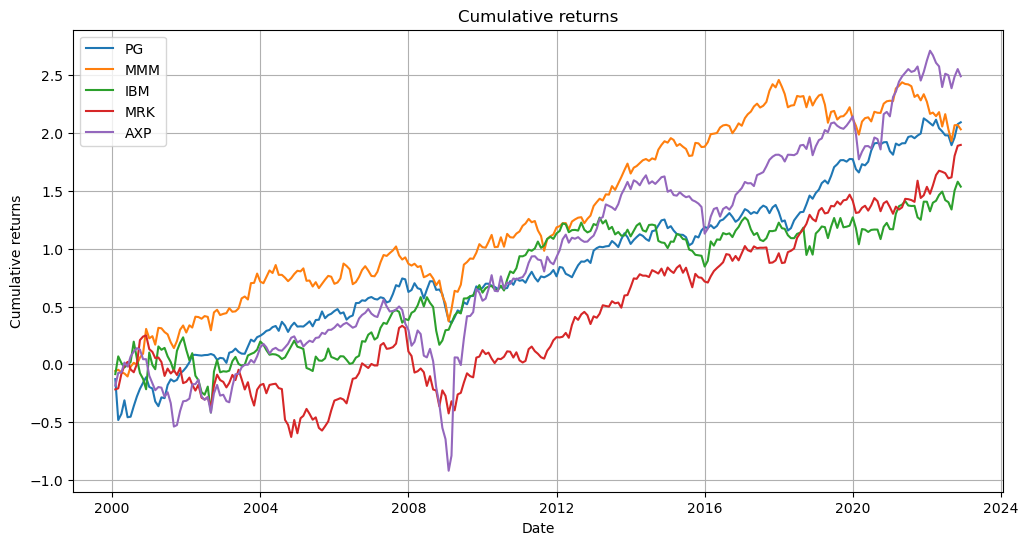

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(Ret.iloc[:, 0], (Ret.iloc[:, 1:].cumsum()))
plt.legend(Ret.iloc[:, 1:].columns)
plt.grid(True)
plt.title("Cumulative returns")
plt.xlabel("Date")
plt.ylabel("Cumulative returns")

Stats = pd.DataFrame(index=['Sharpe ratio', 'Cum. returns', 'Volatility'],
                   columns=Ret.columns[1:])

Stats.loc['Sharpe ratio'] = Ret.iloc[:, 1:].mean(axis=0) / Ret.iloc[:, 1:].std(axis=0)
Stats.loc['Cum. returns'] = Ret.iloc[:, 1:].cumsum(axis=0).iloc[-1,:]
Stats.loc['Volatility'] =  Ret.iloc[:, 1:].std(axis=0)*100

print(Stats)